# Simple Example of MAML

In [287]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, metrics, losses
from matplotlib import pyplot as plt
from sklearn import metrics

### Generate regression data

In [243]:
def sin(x, k=1, phi=0, a=1):
    return a * np.sin(k * x + phi)

In [244]:
x = np.linspace(-3 * np.pi, 3 * np.pi, 10000)
y_1 = sin(x)
y_2 = sin(x, k=2, phi=0.25 * np.pi)

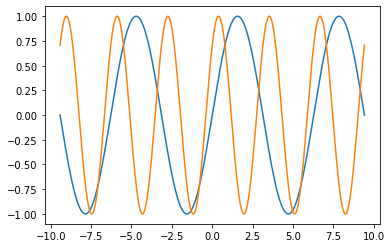

In [245]:
plt.plot(x,y_1)
plt.plot(x,y_2)

### create set of tasks T

In [246]:
k = np.linspace(0.25, 4.00, 20)
phi = np.random.choice([0, 0.25 * np.pi, 0.75 * np.pi, np.pi], 20)

structure:

[t1, t2, t3, ...]  
t = (D_train, D_test)  
D = (x, y)  


In [247]:
from collections import namedtuple

In [248]:
Dataset = namedtuple("Dataset", ["train", "test"])
Data = namedtuple("Data", ["X", "y"])

In [249]:
task_list = []
for k_i, phi_i in zip(k,phi):
    y = sin(x, k=k_i, phi=phi_i)
    X = np.expand_dims(x, -1)
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5)
    D_train = Data(X=X_train, y=y_train)
    D_test = Data(X=X_test, y=y_test)
    D_set = Dataset(train = D_train, test = D_test)
    task_list.append(D_set)

In [250]:
#task_list[0].test.X

In [251]:
task_train, task__ = train_test_split(task_list, test_size=0.5)
task_test, task_val = train_test_split(task__, test_size=0.5)

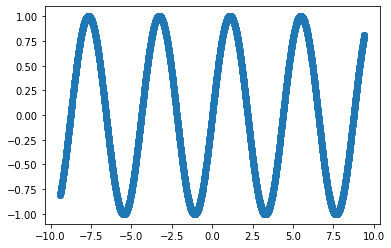

In [252]:
X = task_train[0].train.X[:,0]
y = task_train[0].train.y
d = zip(X,y)
X,y = zip(*sorted(d, key=lambda d: d[0]))

plt.plot(X,y, marker="o")

In [253]:
a, b = list(zip(*d_sorted))

In [254]:
b[0]

array([8.28812132])

### Create single model

In [263]:
reg_model = tf.keras.Sequential(name="regressor")
reg_model.add(layers.Dense(40, input_shape=(1,), activation="relu"))
reg_model.add(layers.Dropout(0.5))
reg_model.add(layers.Dense(40, activation="relu"))
reg_model.add(layers.Dense(1))

In [264]:
reg_model.summary()

Model: "regressor"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 40)                80        
_________________________________________________________________
dropout_9 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 41        
Total params: 1,761
Trainable params: 1,761
Non-trainable params: 0
_________________________________________________________________


In [265]:
# compile
reg_model.compile(loss=losses.mean_squared_error)

In [272]:
# task 1
X = task_train[0].train.X
y = task_train[0].train.y

In [273]:
reg_model.fit(X, y, epochs=100)

Train on 5000 samples
Epoch 1/100
5000/5000 [==============================] - 0s 36us/sample - loss: 0.3805
Epoch 2/100
5000/5000 [==============================] - 0s 34us/sample - loss: 0.3816
Epoch 3/100
5000/5000 [==============================] - 0s 34us/sample - loss: 0.3785
Epoch 4/100
5000/5000 [==============================] - 0s 34us/sample - loss: 0.3761
Epoch 5/100
5000/5000 [==============================] - 0s 34us/sample - loss: 0.3731
Epoch 6/100
5000/5000 [==============================] - 0s 34us/sample - loss: 0.3704
Epoch 7/100
5000/5000 [==============================] - 0s 34us/sample - loss: 0.3714
Epoch 8/100
5000/5000 [==============================] - 0s 34us/sample - loss: 0.3712
Epoch 9/100
5000/5000 [==============================] - 0s 34us/sample - loss: 0.3682
Epoch 10/100
5000/5000 [==============================] - 0s 35us/sample - loss: 0.3684
Epoch 11/100
5000/5000 [==============================] - 0s 34us/sample - loss: 0.3675
Epoch 12/100
5000/5

In [274]:
y_pred = reg_model.predict(task_train[0].test.X)

In [275]:
metrics.r2_score(task_train[0].test.y, y_pred)

0.5300757830249174

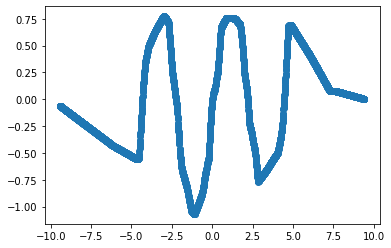

In [276]:
X = task_train[0].test.X[:,0]
y = y_pred
d = zip(X,y)
X,y = zip(*sorted(d, key=lambda d: d[0]))

plt.plot(X,y, marker="o")

In [288]:
def create_subseqs(seq, win_size, n):
    len_seq = len(seq)
    max_start_index = len_seq - win_size
        
    start_indices = list(range(max_start_index))
        
    seq_list = []
    for i in range(n):
        chosen_start_index = np.random.choice(start_indices)
        sub_seq = seq[chosen_start_index:chosen_start_index + win_size]
        sub_seq = sub_seq.copy()
        seq_list.append(sub_seq)
    return seq_list  # list of dfs

In [291]:
create_subseqs([1,3,4,2,3,2], 2, 4)

[[1, 3], [3, 4], [4, 2], [4, 2]]

In [290]:
# samples, seqs, features